In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql
import os
from dotenv import load_dotenv
import start_project
from sqlalchemy import create_engine, select, Table, MetaData, text


The code below takes the average hours worked between those who work Onsite, Remote, or Hybrid. Then it displays them in a bar graph.

2024-10-12 11:25:43,323 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-10-12 11:25:43,323 INFO sqlalchemy.engine.Engine [raw sql] {}


2024-10-12 11:25:43,324 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-10-12 11:25:43,324 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:43,325 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-10-12 11:25:43,326 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:43,327 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-12 11:25:43,328 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `data_collected`
2024-10-12 11:25:43,328 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:43,331 INFO sqlalchemy.engine.Engine ROLLBACK
2024-10-12 11:25:43,332 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-12 11:25:43,333 INFO sqlalchemy.engine.Engine SELECT data_collected.`Work_Location`, data_collected.`Hours_Worked_Per_Week` 
FROM data_collected
2024-10-12 11:25:43,333 INFO sqlalchemy.engine.Engine [generated in 0.00109s] {}
2024-10-12 11:25:43,349 INFO sqlalchemy.engine.Engine SELECT data_collected.`Work_Location`, data_collected.`Hour

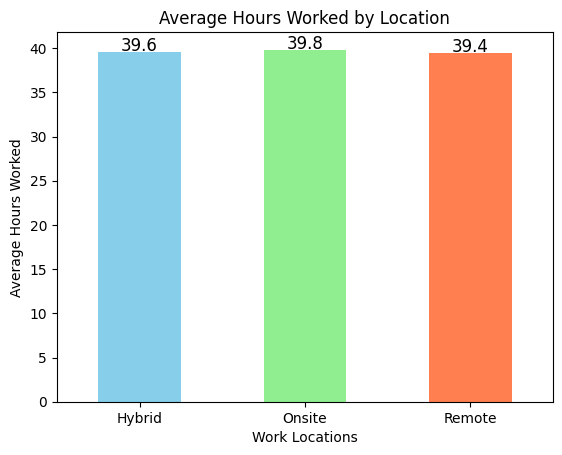

In [27]:
load_dotenv()

engine = create_engine (os.getenv("DATABASE_URL"), echo=True)
metadata_obj = MetaData()

data_collected = Table('data_collected', metadata_obj, autoload_with=engine)

stmt = select(
    data_collected.c.Work_Location,
    data_collected.c.Hours_Worked_Per_Week
)

with engine.connect() as conn:
     result = conn.execute(stmt)
     df = pd.read_sql(stmt, conn)
     print(result.all())

connection = pymysql.connect(
    host= os.getenv('HOST'),
    user= os.getenv('USER'),
    password= os.getenv('PASSWORD'),
    database= os.getenv('DATABASE'),
)

connection.close() 

average_hours = df.groupby('Work_Location')['Hours_Worked_Per_Week'].mean()

average_hours.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])

plt.ylabel('Average Hours Worked')
plt.xlabel('Work Locations')
plt.title('Average Hours Worked by Location')

for i, value in enumerate(average_hours):
    plt.text(i, value + 0.1, round(value, 1), ha='center', fontsize=12)

plt.xticks(rotation=0)

plt.show()

The code below allows us to take the responses of workers mental health condition and compare those answers between where the worker is currently located at.

2024-10-12 11:25:29,175 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-10-12 11:25:29,176 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:29,176 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-10-12 11:25:29,177 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:29,177 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-10-12 11:25:29,178 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:29,179 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-12 11:25:29,180 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `data_collected`
2024-10-12 11:25:29,180 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:29,182 INFO sqlalchemy.engine.Engine ROLLBACK
2024-10-12 11:25:29,183 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-12 11:25:29,183 INFO sqlalchemy.engine.Engine SELECT data_collected.`Work_Location`, data_collected.`Mental_Health_Condition` 
FROM data_collected
2024-10-12 11:25:29,184 INFO sqlalchemy.engine.Engine

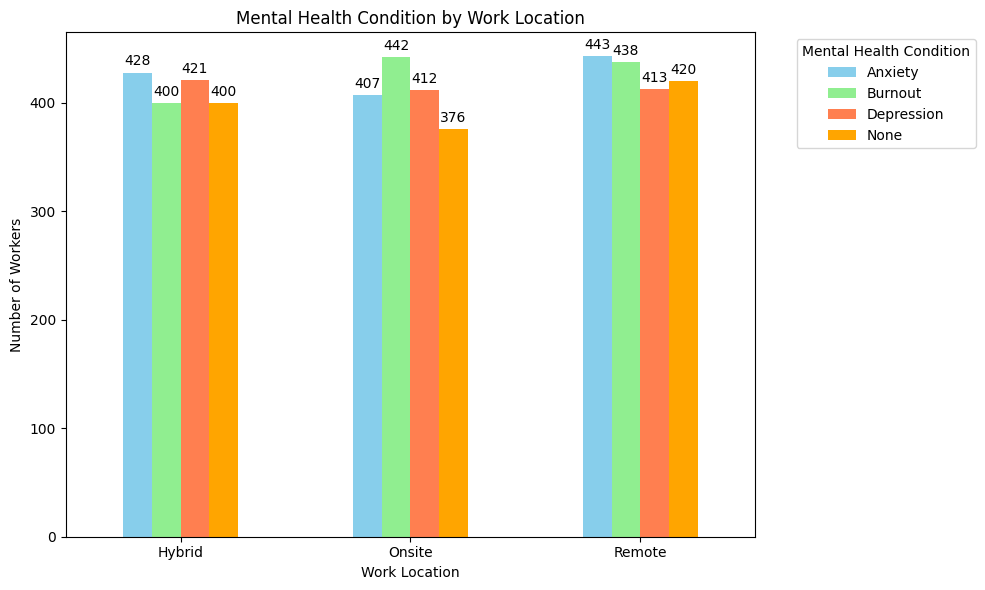

In [24]:
load_dotenv()

engine = create_engine (os.getenv("DATABASE_URL"), echo=True)
metadata_obj = MetaData()

data_collected = Table('data_collected', metadata_obj, autoload_with=engine)

stmt = select(
    data_collected.c.Work_Location,
    data_collected.c.Mental_Health_Condition
)

with engine.connect() as conn:
     result = conn.execute(stmt)
     df = pd.read_sql(stmt, conn)
     print(result.all())

connection = pymysql.connect(
    host= os.getenv('HOST'),
    user= os.getenv('USER'),
    password= os.getenv('PASSWORD'),
    database= os.getenv('DATABASE'),
)

connection.close()

condition_counts = df.groupby(['Work_Location', 'Mental_Health_Condition']).size().unstack(fill_value=0)

ax = condition_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightgreen', 'coral', 'orange'])

plt.ylabel('Number of Workers')
plt.xlabel('Work Location')
plt.title('Mental Health Condition by Work Location')

plt.xticks(rotation=0)

plt.legend(title='Mental Health Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points", 
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()

2024-10-12 11:25:33,495 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-10-12 11:25:33,496 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:33,496 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-10-12 11:25:33,496 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:33,497 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-10-12 11:25:33,497 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:33,498 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-12 11:25:33,498 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `data_collected`
2024-10-12 11:25:33,499 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-12 11:25:33,500 INFO sqlalchemy.engine.Engine ROLLBACK
2024-10-12 11:25:33,502 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-12 11:25:33,502 INFO sqlalchemy.engine.Engine SELECT data_collected.`Work_Location`, data_collected.`Company_Support_for_Remote_Work` 
FROM data_collected 
WHERE data_collected.`Work_Location` IN (%(W

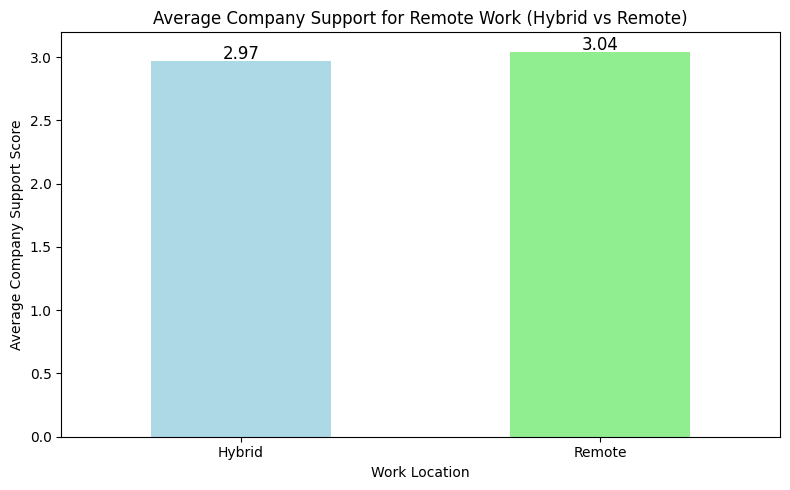

In [25]:
load_dotenv()

engine = create_engine (os.getenv("DATABASE_URL"), echo=True)
metadata_obj = MetaData()

data_collected = Table('data_collected', metadata_obj, autoload_with=engine)

stmt = select(
    data_collected.columns.Work_Location,
    data_collected.columns.Company_Support_for_Remote_Work
).where(
    data_collected.c.Work_Location.in_(['Remote','Hybrid'])
)

with engine.connect() as conn:
     result = conn.execute(stmt)
     df = pd.read_sql(stmt, conn)
     print(result.all())

connection = pymysql.connect(
    host= os.getenv('HOST'),
    user= os.getenv('USER'),
    password= os.getenv('PASSWORD'),
    database= os.getenv('DATABASE'),
)

connection.close()

average_support = df.groupby('Work_Location')['Company_Support_for_Remote_Work'].mean()

ax = average_support.plot(kind='bar', color=['lightblue', 'lightgreen'], figsize=(8, 5))

plt.ylabel('Average Company Support Score')
plt.xlabel('Work Location')
plt.title('Average Company Support for Remote Work (Hybrid vs Remote)')

for i, value in enumerate(average_support):
    plt.text(i, value + 0.01, round(value, 2), ha='center', fontsize=12)
    
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()